In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [11]:
df= pd.read_csv("production and pressure data.csv")

In [12]:
df

,Unnamed: 0,Oil Production,Date,Pressure
0,0,8045.2,2005-01-01,353.5
1,1,9243.7,2005-02-01,426.8
2,2,7498.1,2005-03-01,313.4
3,3,6840.4,2005-04-01,362.5
4,4,6470.0,2005-05-01,456.1
...,...,...,...,...
56,56,727.9,2009-09-01,105.1
57,57,797.7,2009-10-01,119.9
58,58,685.8,2009-11-01,103.0
59,59,675.3,2009-12-01,105.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      61 non-null     int64  
 1   Oil Production  61 non-null     float64
 2   Date            61 non-null     object 
 3   Pressure        61 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [13]:
df.index = pd.to_datetime(df["Date"])
df= df.drop("Unnamed: 0",axis=1)

In [16]:
df

,Oil Production,Date,Pressure
Date,,,
2005-01-01,8045.2,2005-01-01,353.5
2005-02-01,9243.7,2005-02-01,426.8
2005-03-01,7498.1,2005-03-01,313.4
2005-04-01,6840.4,2005-04-01,362.5
2005-05-01,6470.0,2005-05-01,456.1
...,...,...,...
2009-09-01,727.9,2009-09-01,105.1
2009-10-01,797.7,2009-10-01,119.9
2009-11-01,685.8,2009-11-01,103.0


<AxesSubplot:xlabel='Date'>

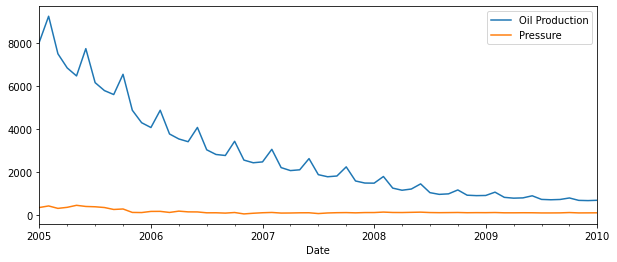

In [18]:
df.plot(figsize = (10,4))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

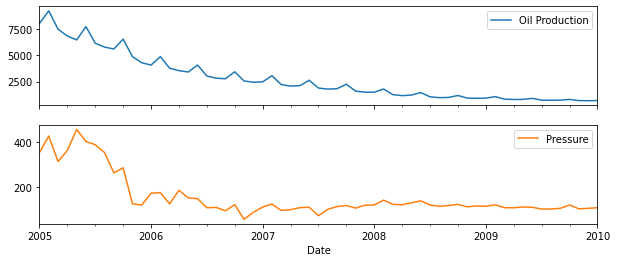

In [19]:
df.plot(figsize = (10,4),subplots = True)

## Stationary

## KPSS test

- null hypothesis: Series is stationary = Ho

- Alternate hypothesis: Series is non stationary = H1

#### If p is low reject the ho,

- p<0.05 : reject null hypothesis: Series is non stationary

- p >= 0.05 : failed to reject null hypothesis: Series is stationary

In [20]:
from statsmodels.tsa.stattools import kpss,adfuller

In [22]:
_,p,_,_ = kpss(df["Oil Production"])

In [23]:
p

0.024205159969745874

In [24]:
print(f"p-value is: {p}" )


if p<0.05:
    print("Null hypothesies rejected")
    print("Data is not stationary")

else:
    print("Null hypothesies failed to rejected")
    print("Data is stationary")

p-value is: 0.024205159969745874
Null hypothesies rejected
Data is not stationary


In [25]:
_,p,_,_ = kpss(df["Pressure"])

print(f"p-value is: {p}" )


if p<0.05:
    print("Null hypothesies rejected")
    print("Data is not stationary")

else:
    print("Null hypothesies failed to rejected")
    print("Data is stationary")

p-value is: 0.07401601875918287
Null hypothesies failed to rejected
Data is stationary


## ADF test

- Null Hypothesis: Time series is not stationary

- Alternate Hypothesis: Time series is stationary 

In [33]:
r = adfuller(df["Oil Production"])


In [36]:
 p = r[1]

In [37]:
print(f"p value is {p}")
if p<0.05:
    print("Null hypothesies rejected")
    print("Data is stationary")

else:
    print("Null hypothesies accepted")
    print("Data is not stationary")

p value is 0.12947943121838767
Null hypothesies accepted
Data is not stationary


## Differencing: making non stationary time series stationary/


In [38]:
df

,Oil Production,Date,Pressure
Date,,,
2005-01-01,8045.2,2005-01-01,353.5
2005-02-01,9243.7,2005-02-01,426.8
2005-03-01,7498.1,2005-03-01,313.4
2005-04-01,6840.4,2005-04-01,362.5
2005-05-01,6470.0,2005-05-01,456.1
...,...,...,...
2009-09-01,727.9,2009-09-01,105.1
2009-10-01,797.7,2009-10-01,119.9
2009-11-01,685.8,2009-11-01,103.0


In [40]:
df[["Oil Production"]]

,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,9243.7
2005-03-01,7498.1
2005-04-01,6840.4
2005-05-01,6470.0
...,...
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8


<AxesSubplot:xlabel='Date'>

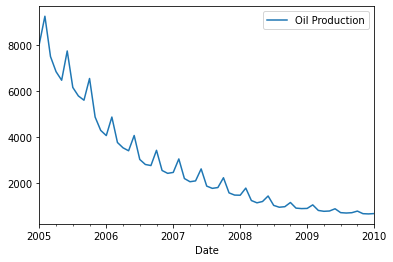

In [41]:
df[["Oil Production"]].plot()

<AxesSubplot:xlabel='Date'>

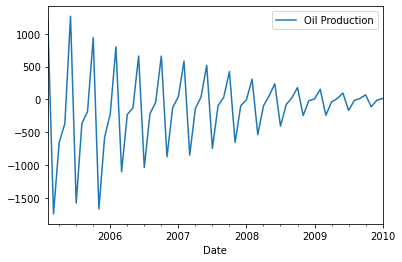

In [56]:
df[["Oil Production"]].diff()[1:].plot()

In [55]:
df[["Oil Production"]].diff()[1:]["Oil Production"]

Date
2005-02-01    1198.5
2005-03-01   -1745.6
2005-04-01    -657.7
2005-05-01    -370.4
2005-06-01    1268.3
2005-07-01   -1580.7
2005-08-01    -369.0
2005-09-01    -184.4
2005-10-01     941.1
2005-11-01   -1670.9
2005-12-01    -578.9
2006-01-01    -224.1
2006-02-01     802.7
2006-03-01   -1102.7
2006-04-01    -231.0
2006-05-01    -127.6
2006-06-01     661.8
2006-07-01   -1038.8
2006-08-01    -217.3
2006-09-01     -46.8
2006-10-01     661.1
2006-11-01    -874.9
2006-12-01    -123.9
2007-01-01      40.1
2007-02-01     584.5
2007-03-01    -849.4
2007-04-01    -138.8
2007-05-01      36.6
2007-06-01     519.8
2007-07-01    -746.2
2007-08-01     -97.2
2007-09-01      35.1
2007-10-01     424.6
2007-11-01    -655.5
2007-12-01     -96.3
2008-01-01      -5.6
2008-02-01     309.0
2008-03-01    -538.7
2008-04-01     -99.4
2008-05-01      56.5
2008-06-01     238.9
2008-07-01    -407.1
2008-08-01     -79.8
2008-09-01      23.8
2008-10-01     181.5
2008-11-01    -244.0
2008-12-01     -20.1
2009-01-

In [53]:
r = adfuller(df[["Oil Production"]].diff()[1:]["Oil Production"])


In [54]:
p = r[1]
print(f"p value is {p}")
if p<0.05:
    print("Null hypothesies rejected")
    print("Data is stationary")

else:
    print("Null hypothesies accepted")
    print("Data is not stationary")

p value is 4.642045037471511e-05
Null hypothesies rejected
Data is stationary


<AxesSubplot:xlabel='Date'>

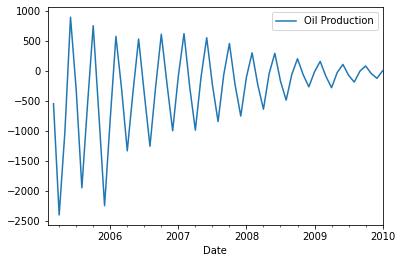

In [57]:
df[["Oil Production"]].diff(2)[1:].plot()

In [58]:
df[["Oil Production"]].diff(2)

,Oil Production
Date,
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,-547.1
2005-04-01,-2403.3
2005-05-01,-1028.1
...,...
2009-09-01,-2.8
2009-10-01,83.8
2009-11-01,-42.1


## Time series decomposition:

ts = trend+seasonality+residual

In [60]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [61]:
import statsmodels.api as sm


In [63]:
dec = sm.tsa.seasonal_decompose(df["Oil Production"])

In [64]:
dec

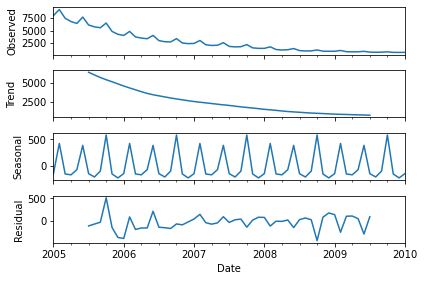

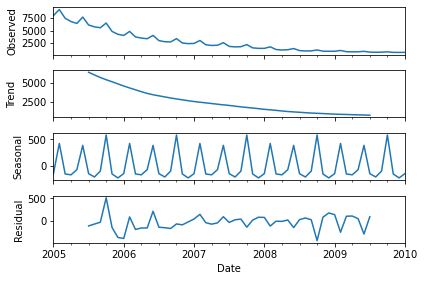

In [65]:
dec.plot()

<AxesSubplot:xlabel='Date'>

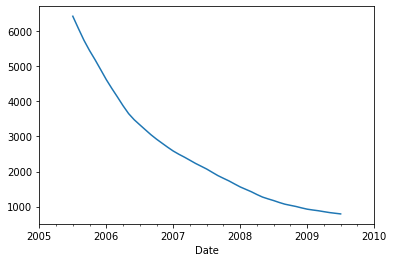

In [66]:
dec.trend.plot()

<AxesSubplot:xlabel='Date'>

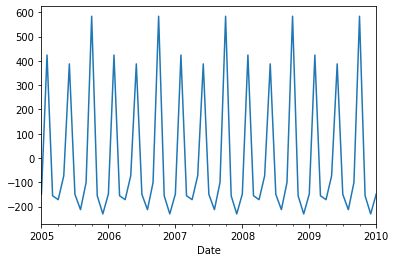

In [67]:
dec.seasonal.plot()

## Additivemodel: Observed = tremd+seasonailty+residual
## multiplicativemodel: Observed = trend*seasonality+residual

In [68]:
dec = sm.tsa.seasonal_decompose(df["Oil Production"],model='multiplicative')

<AxesSubplot:xlabel='Date'>

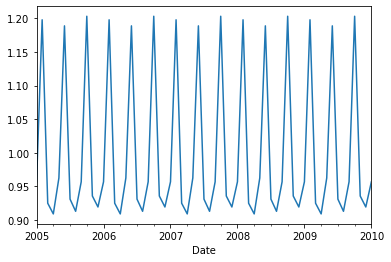

In [69]:
dec.seasonal.plot()

<AxesSubplot:xlabel='Date'>

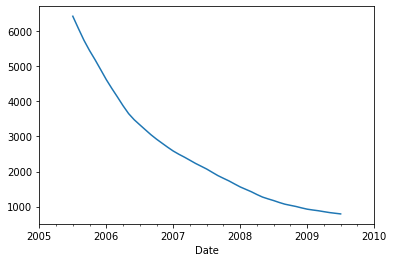

In [70]:
dec.trend.plot()

<AxesSubplot:xlabel='Date'>

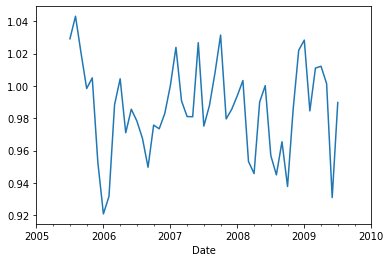

In [78]:
dec.resid.plot()

In [76]:
df = pd.DataFrame({"trend":dec.trend,"seasonality":dec.seasonal,"residual":dec.resid})

In [71]:
dec.trend

Date
2005-01-01   NaN
2005-02-01   NaN
2005-03-01   NaN
2005-04-01   NaN
2005-05-01   NaN
              ..
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
2010-01-01   NaN
Name: Oil Production, Length: 61, dtype: float64

In [77]:
df[5:]

,trend,seasonality,residual
Date,,,
2005-06-01,NaN,1.188993,NaN
2005-07-01,6426.200000,0.931076,1.029134
2005-08-01,6078.558333,0.912988,1.043057
2005-09-01,5741.212500,0.956900,1.020101
2005-10-01,5448.433333,1.203297,0.998355
2005-11-01,5183.550000,0.935748,1.004928
2005-12-01,4903.512500,0.919400,0.952800
2006-01-01,4620.783333,0.956903,0.920789
2006-02-01,4366.954167,1.198018,0.931649


In [85]:
df= pd.read_csv("production and pressure data.csv")

In [86]:
df

,Unnamed: 0,Oil Production,Date,Pressure
0,0,8045.2,2005-01-01,353.5
1,1,9243.7,2005-02-01,426.8
2,2,7498.1,2005-03-01,313.4
3,3,6840.4,2005-04-01,362.5
4,4,6470.0,2005-05-01,456.1
...,...,...,...,...
56,56,727.9,2009-09-01,105.1
57,57,797.7,2009-10-01,119.9
58,58,685.8,2009-11-01,103.0
59,59,675.3,2009-12-01,105.2


In [87]:
df.index = pd.to_datetime(df["Date"])
df= df.drop("Unnamed: 0",axis=1)

In [88]:
df

,Oil Production,Date,Pressure
Date,,,
2005-01-01,8045.2,2005-01-01,353.5
2005-02-01,9243.7,2005-02-01,426.8
2005-03-01,7498.1,2005-03-01,313.4
2005-04-01,6840.4,2005-04-01,362.5
2005-05-01,6470.0,2005-05-01,456.1
...,...,...,...
2009-09-01,727.9,2009-09-01,105.1
2009-10-01,797.7,2009-10-01,119.9
2009-11-01,685.8,2009-11-01,103.0


In [89]:
df = df[["Oil Production"]]

In [90]:
df

,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,9243.7
2005-03-01,7498.1
2005-04-01,6840.4
2005-05-01,6470.0
...,...
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8


## Resample

D	Calendar day	

B	Business day

W	Weekly		

M	Month

Q	Quarter

A	Year end

H	Hours

T	Minutes		

S	Seconds	

<AxesSubplot:xlabel='Date'>

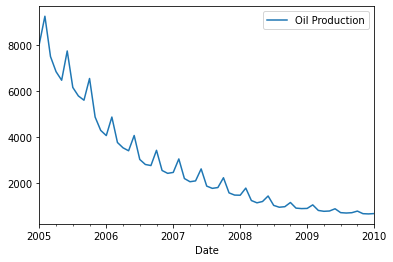

In [92]:
df.plot()

<AxesSubplot:xlabel='Date'>

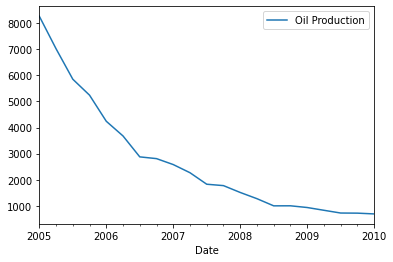

In [94]:
df.resample("Q").mean().plot()

In [95]:
df

,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,9243.7
2005-03-01,7498.1
2005-04-01,6840.4
2005-05-01,6470.0
...,...
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8


In [96]:
df.resample("Q").mean()

,Oil Production
Date,
2005-03-31,8262.333333
2005-06-30,7016.233333
2005-09-30,5850.133333
2005-12-31,5238.400000
2006-03-31,4238.966667
2006-06-30,3675.933333
2006-09-30,2875.333333
2006-12-31,2808.233333
2007-03-31,2580.633333


In [97]:
len(df.resample("Q").mean())

21

## Rolling  window

In [98]:
df

,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,9243.7
2005-03-01,7498.1
2005-04-01,6840.4
2005-05-01,6470.0
...,...
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8


In [99]:
df.rolling(window=3).mean()

,Oil Production
Date,
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,8262.333333
2005-04-01,7860.733333
2005-05-01,6936.166667
...,...
2009-09-01,724.166667
2009-10-01,746.500000
2009-11-01,737.133333


<AxesSubplot:xlabel='Date'>

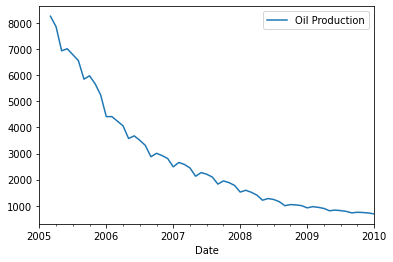

In [100]:
df.rolling(window=3).mean().plot()

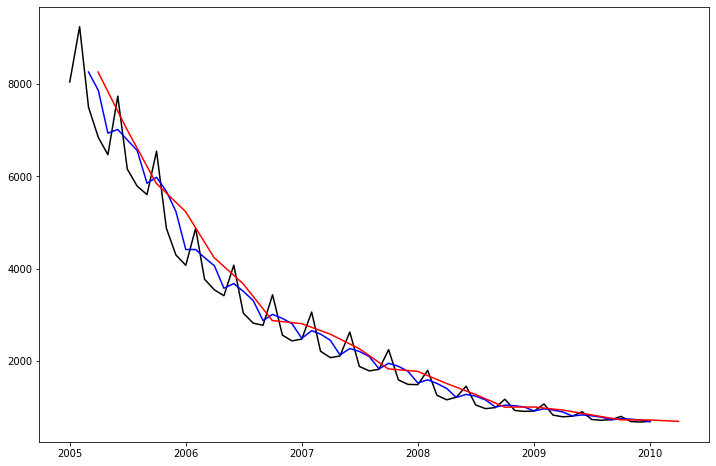

In [103]:
plt.figure(figsize=(12,8))
plt.plot(df["Oil Production"],c="black")
plt.plot(df.index,df["Oil Production"].rolling(window=3).mean(),c= "blue")
plt.plot(df.resample("Q").mean().index,df.resample("Q").mean(),c = "red")

In [104]:
## diff

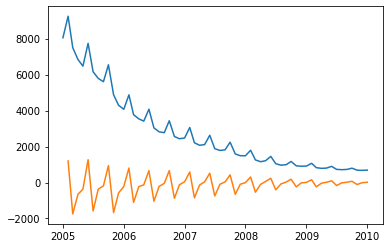

In [105]:
plt.plot(df)
plt.plot(df.diff())

### Shift

- shift index and data values

In [106]:
df

,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,9243.7
2005-03-01,7498.1
2005-04-01,6840.4
2005-05-01,6470.0
...,...
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8


In [107]:
df.shift()

,Oil Production
Date,
2005-01-01,NaN
2005-02-01,8045.2
2005-03-01,9243.7
2005-04-01,7498.1
2005-05-01,6840.4
...,...
2009-09-01,713.9
2009-10-01,727.9
2009-11-01,797.7


In [108]:
df.shift(2)

,Oil Production
Date,
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,8045.2
2005-04-01,9243.7
2005-05-01,7498.1
...,...
2009-09-01,730.7
2009-10-01,713.9
2009-11-01,727.9


## CUMSUM

In [109]:
df

,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,9243.7
2005-03-01,7498.1
2005-04-01,6840.4
2005-05-01,6470.0
...,...
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8


In [110]:
df.cumsum()

,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,17288.9
2005-03-01,24787.0
2005-04-01,31627.4
2005-05-01,38097.4
...,...
2009-09-01,167075.5
2009-10-01,167873.2
2009-11-01,168559.0


<AxesSubplot:xlabel='Date'>

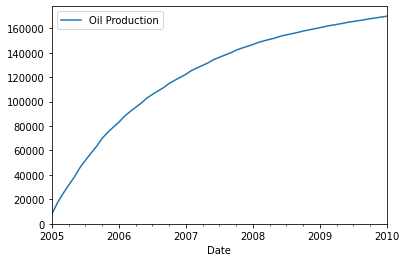

In [111]:
df.cumsum().plot()

## PCT Change

In [112]:
df

,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,9243.7
2005-03-01,7498.1
2005-04-01,6840.4
2005-05-01,6470.0
...,...
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8


In [113]:
df.pct_change()

,Oil Production
Date,
2005-01-01,NaN
2005-02-01,0.148971
2005-03-01,-0.188842
2005-04-01,-0.087716
2005-05-01,-0.054149
...,...
2009-09-01,0.019611
2009-10-01,0.095892
2009-11-01,-0.140278
